## 1. Necessary Libraries!

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Read Dataset

In [106]:
cell_df = pd.read_csv('KDDTest+.txt')
cell_df.head()
cell_df.shape
cell_df.size
cell_df.count()

0          22543
tcp        22543
private    22543
REJ        22543
0.1        22543
0.2        22543
0.3        22543
0.4        22543
0.5        22543
0.6        22543
0.7        22543
0.8        22543
0.9        22543
0.10       22543
0.11       22543
0.12       22543
0.13       22543
0.14       22543
0.15       22543
0.16       22543
0.17       22543
0.18       22543
229        22543
10         22543
0.00       22543
0.00.1     22543
1.00       22543
1.00.1     22543
0.04       22543
0.06       22543
0.00.2     22543
255        22543
10.1       22543
0.04.1     22543
0.06.1     22543
0.00.3     22543
0.00.4     22543
0.00.5     22543
0.00.6     22543
1.00.2     22543
1.00.3     22543
neptune    22543
21         22543
dtype: int64

## 2.1 Adjust Column

In [107]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count','srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

cell_df.columns = columns

In [108]:
cell_df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


## 2.2 Data Insight

In [109]:
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [110]:
cell_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,22543.0,218.868784,1407.207069,0.0,0.00,0.00,0.00,57715.0
src_bytes,22543.0,10395.911369,472796.912692,0.0,0.00,54.00,287.00,62825648.0
dst_bytes,22543.0,2056.110012,21219.763847,0.0,0.00,46.00,601.00,1345927.0
land,22543.0,0.000311,0.017619,0.0,0.00,0.00,0.00,1.0
wrong_fragment,22543.0,0.008428,0.142602,0.0,0.00,0.00,0.00,3.0
urgent,22543.0,0.000710,0.036474,0.0,0.00,0.00,0.00,3.0
hot,22543.0,0.105399,0.928448,0.0,0.00,0.00,0.00,101.0
num_failed_logins,22543.0,0.021648,0.150331,0.0,0.00,0.00,0.00,4.0
logged_in,22543.0,0.442222,0.496661,0.0,0.00,0.00,1.00,1.0
num_compromised,22543.0,0.119904,7.269758,0.0,0.00,0.00,0.00,796.0


## 3. Data Cleaning

### 3.1 Null values

In [111]:
cell_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Dataset doesnot contain any null values.

In [112]:
#helper function for deeper analysis
def unique_values(cell_df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = cell_df[column_name].unique()
        value_counts = cell_df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [113]:
cat_features = cell_df.select_dtypes(include='object').columns
unique_values(cell_df, cat_features)

Column: protocol_type
------------------------------
Unique Values (3): ['tcp' 'icmp' 'udp']

Value Counts:
protocol_type
tcp     18879
udp      2621
icmp     1043
Name: count, dtype: int64

Column: service
------------------------------
Unique Values (64): ['private' 'ftp_data' 'eco_i' 'telnet' 'http' 'smtp' 'ftp' 'ldap' 'pop_3'
 'courier' 'discard' 'ecr_i' 'imap4' 'domain_u' 'mtp' 'systat' 'iso_tsap'
 'other' 'csnet_ns' 'finger' 'uucp' 'whois' 'netbios_ns' 'link' 'Z39_50'
 'sunrpc' 'auth' 'netbios_dgm' 'uucp_path' 'vmnet' 'domain' 'name' 'pop_2'
 'http_443' 'urp_i' 'login' 'gopher' 'exec' 'time' 'remote_job' 'ssh'
 'kshell' 'sql_net' 'shell' 'hostnames' 'echo' 'daytime' 'pm_dump' 'IRC'
 'netstat' 'ctf' 'nntp' 'netbios_ssn' 'tim_i' 'supdup' 'bgp' 'nnsp' 'rje'
 'printer' 'efs' 'X11' 'ntp_u' 'klogin' 'tftp_u']

Value Counts:
service
http       7853
private    4773
telnet     1626
pop_3      1019
smtp        934
           ... 
printer      11
ntp_u        10
rje           8
tim_i       

Further analysis will be in EDA-VISAULAZTION part about these column's impacts on Attacks

In [114]:
cell_df.duplicated().sum()

0

NO DUPLICATED ROW

## 3.3 OUTLIERS

In [115]:
cell_df.shape

(22543, 43)

<Figure size 2000x4000 with 0 Axes>

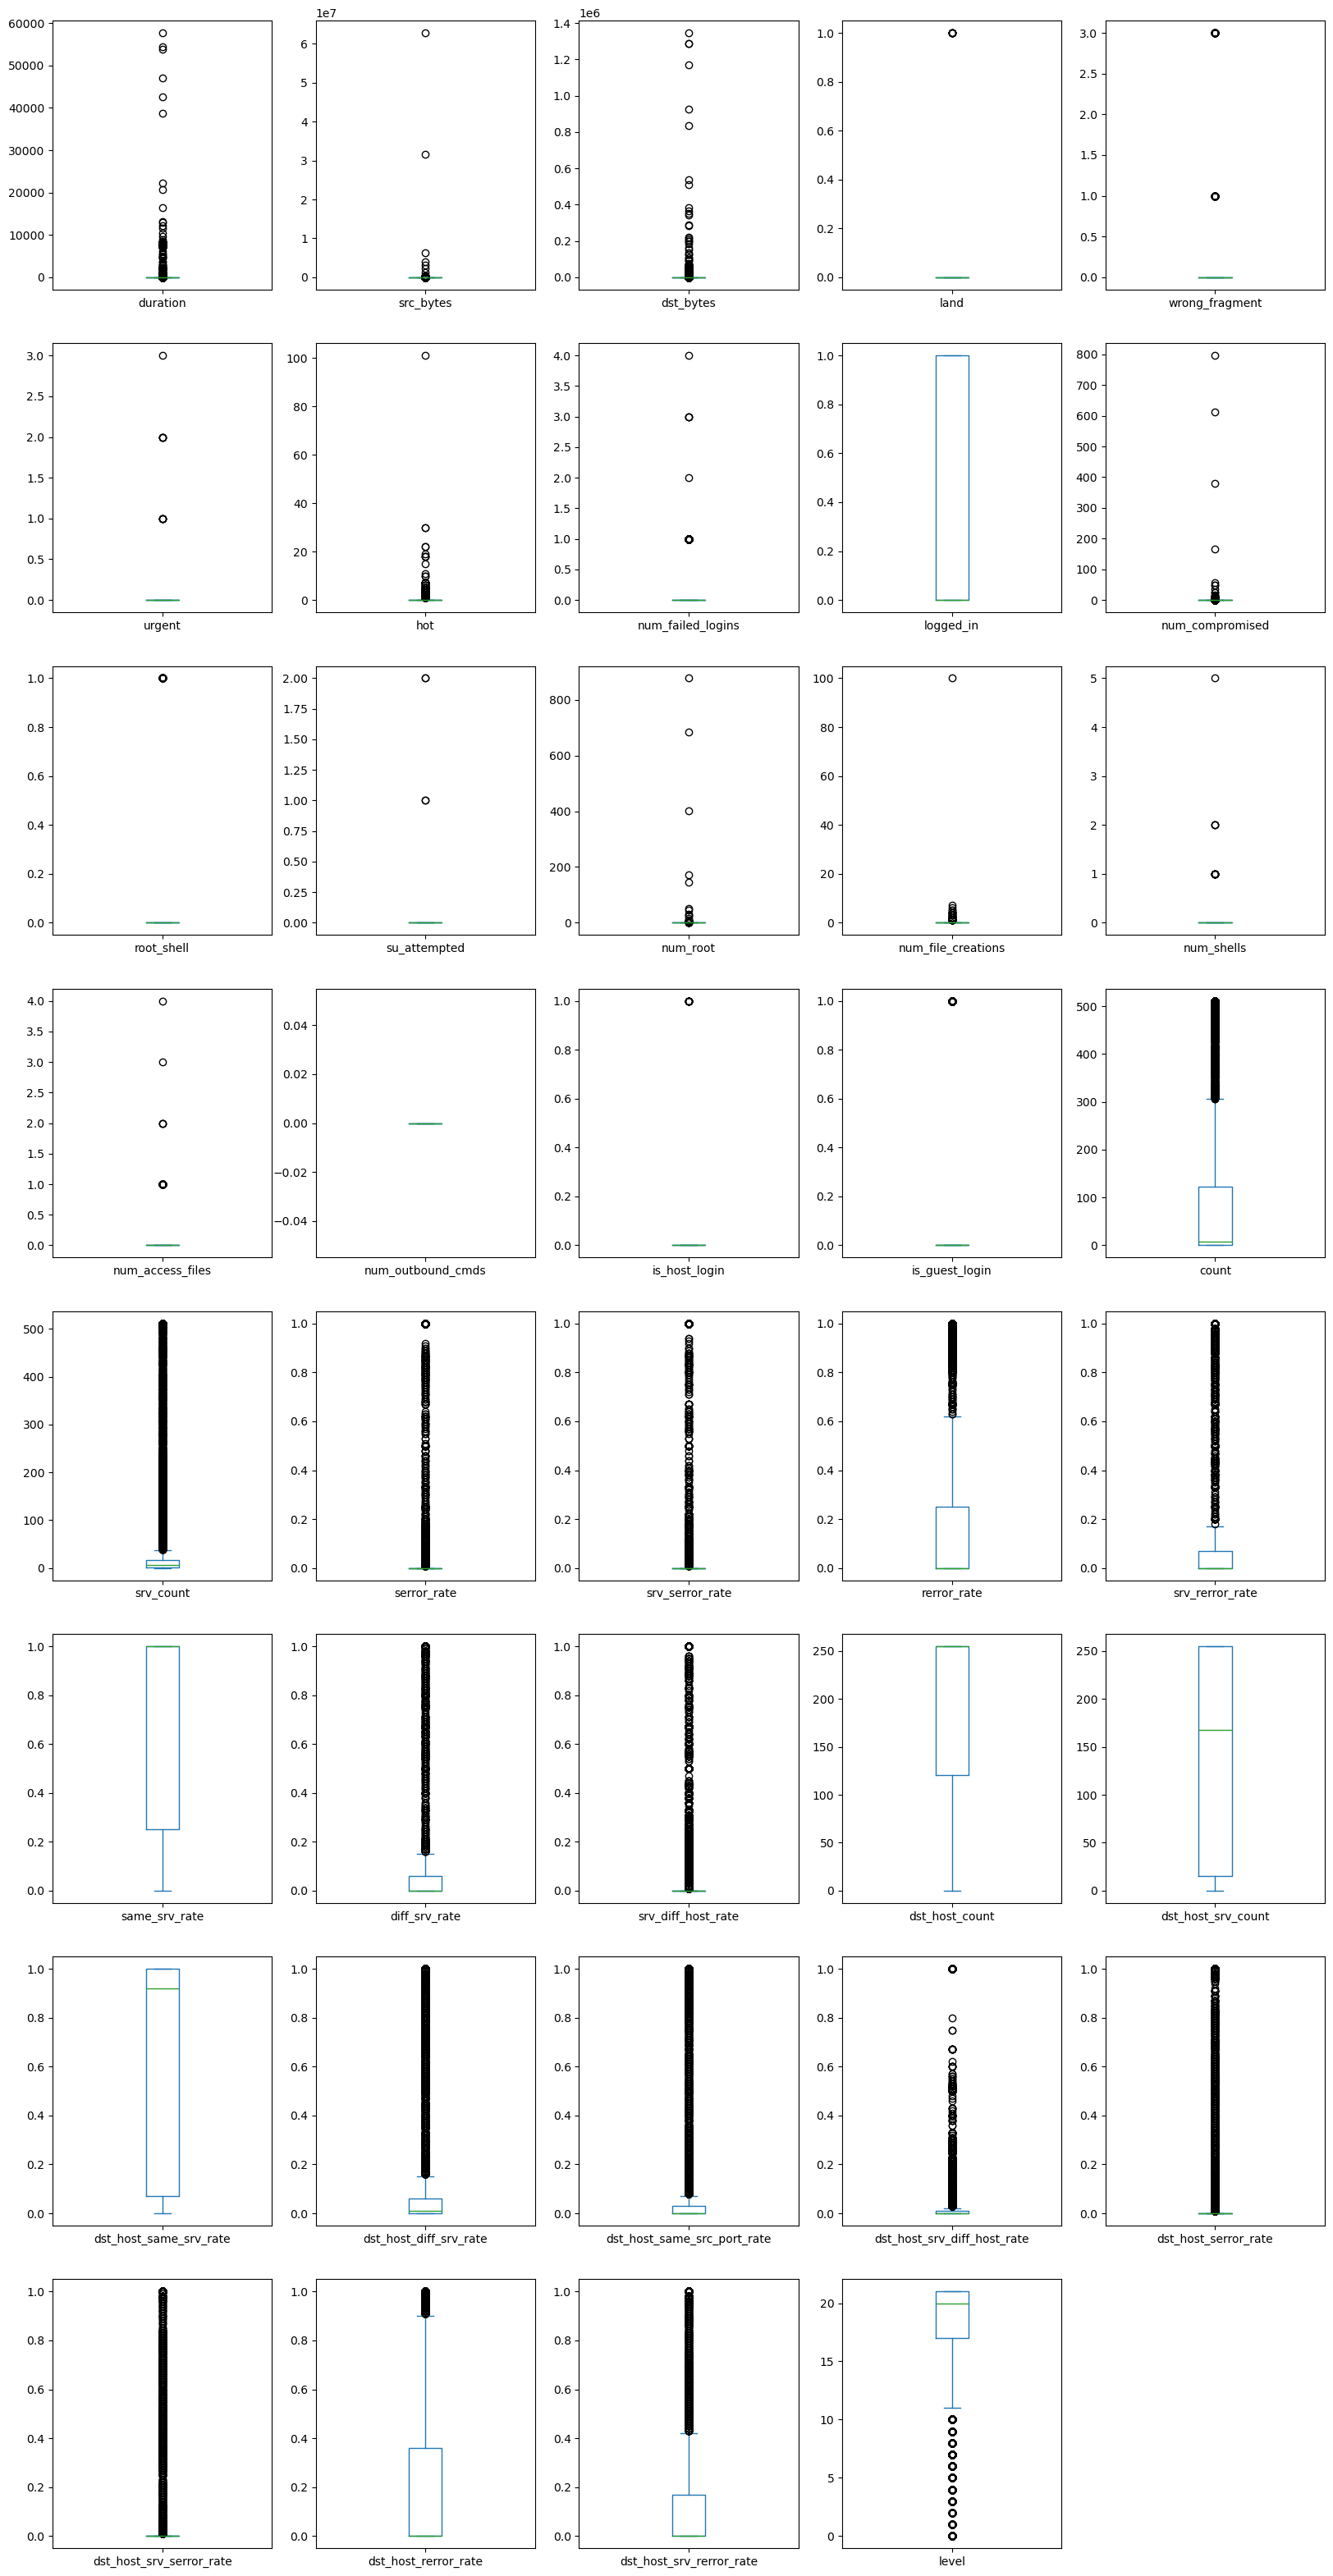

In [116]:
plt.figure(figsize=(20,40))
cell_df.plot(kind= "box", subplots = True, layout = (8,5), figsize = (20,40))
plt.show()

## 3.4 CLASSIFY ATTACK OR NOT

In [117]:
attack_n = []
for i in cell_df.attack :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
cell_df['attack'] = attack_n 

In [118]:
cell_df['attack'].unique()

array(['attack', 'normal'], dtype=object)

## 4. Exploratory data analysis (EDA) - visualization

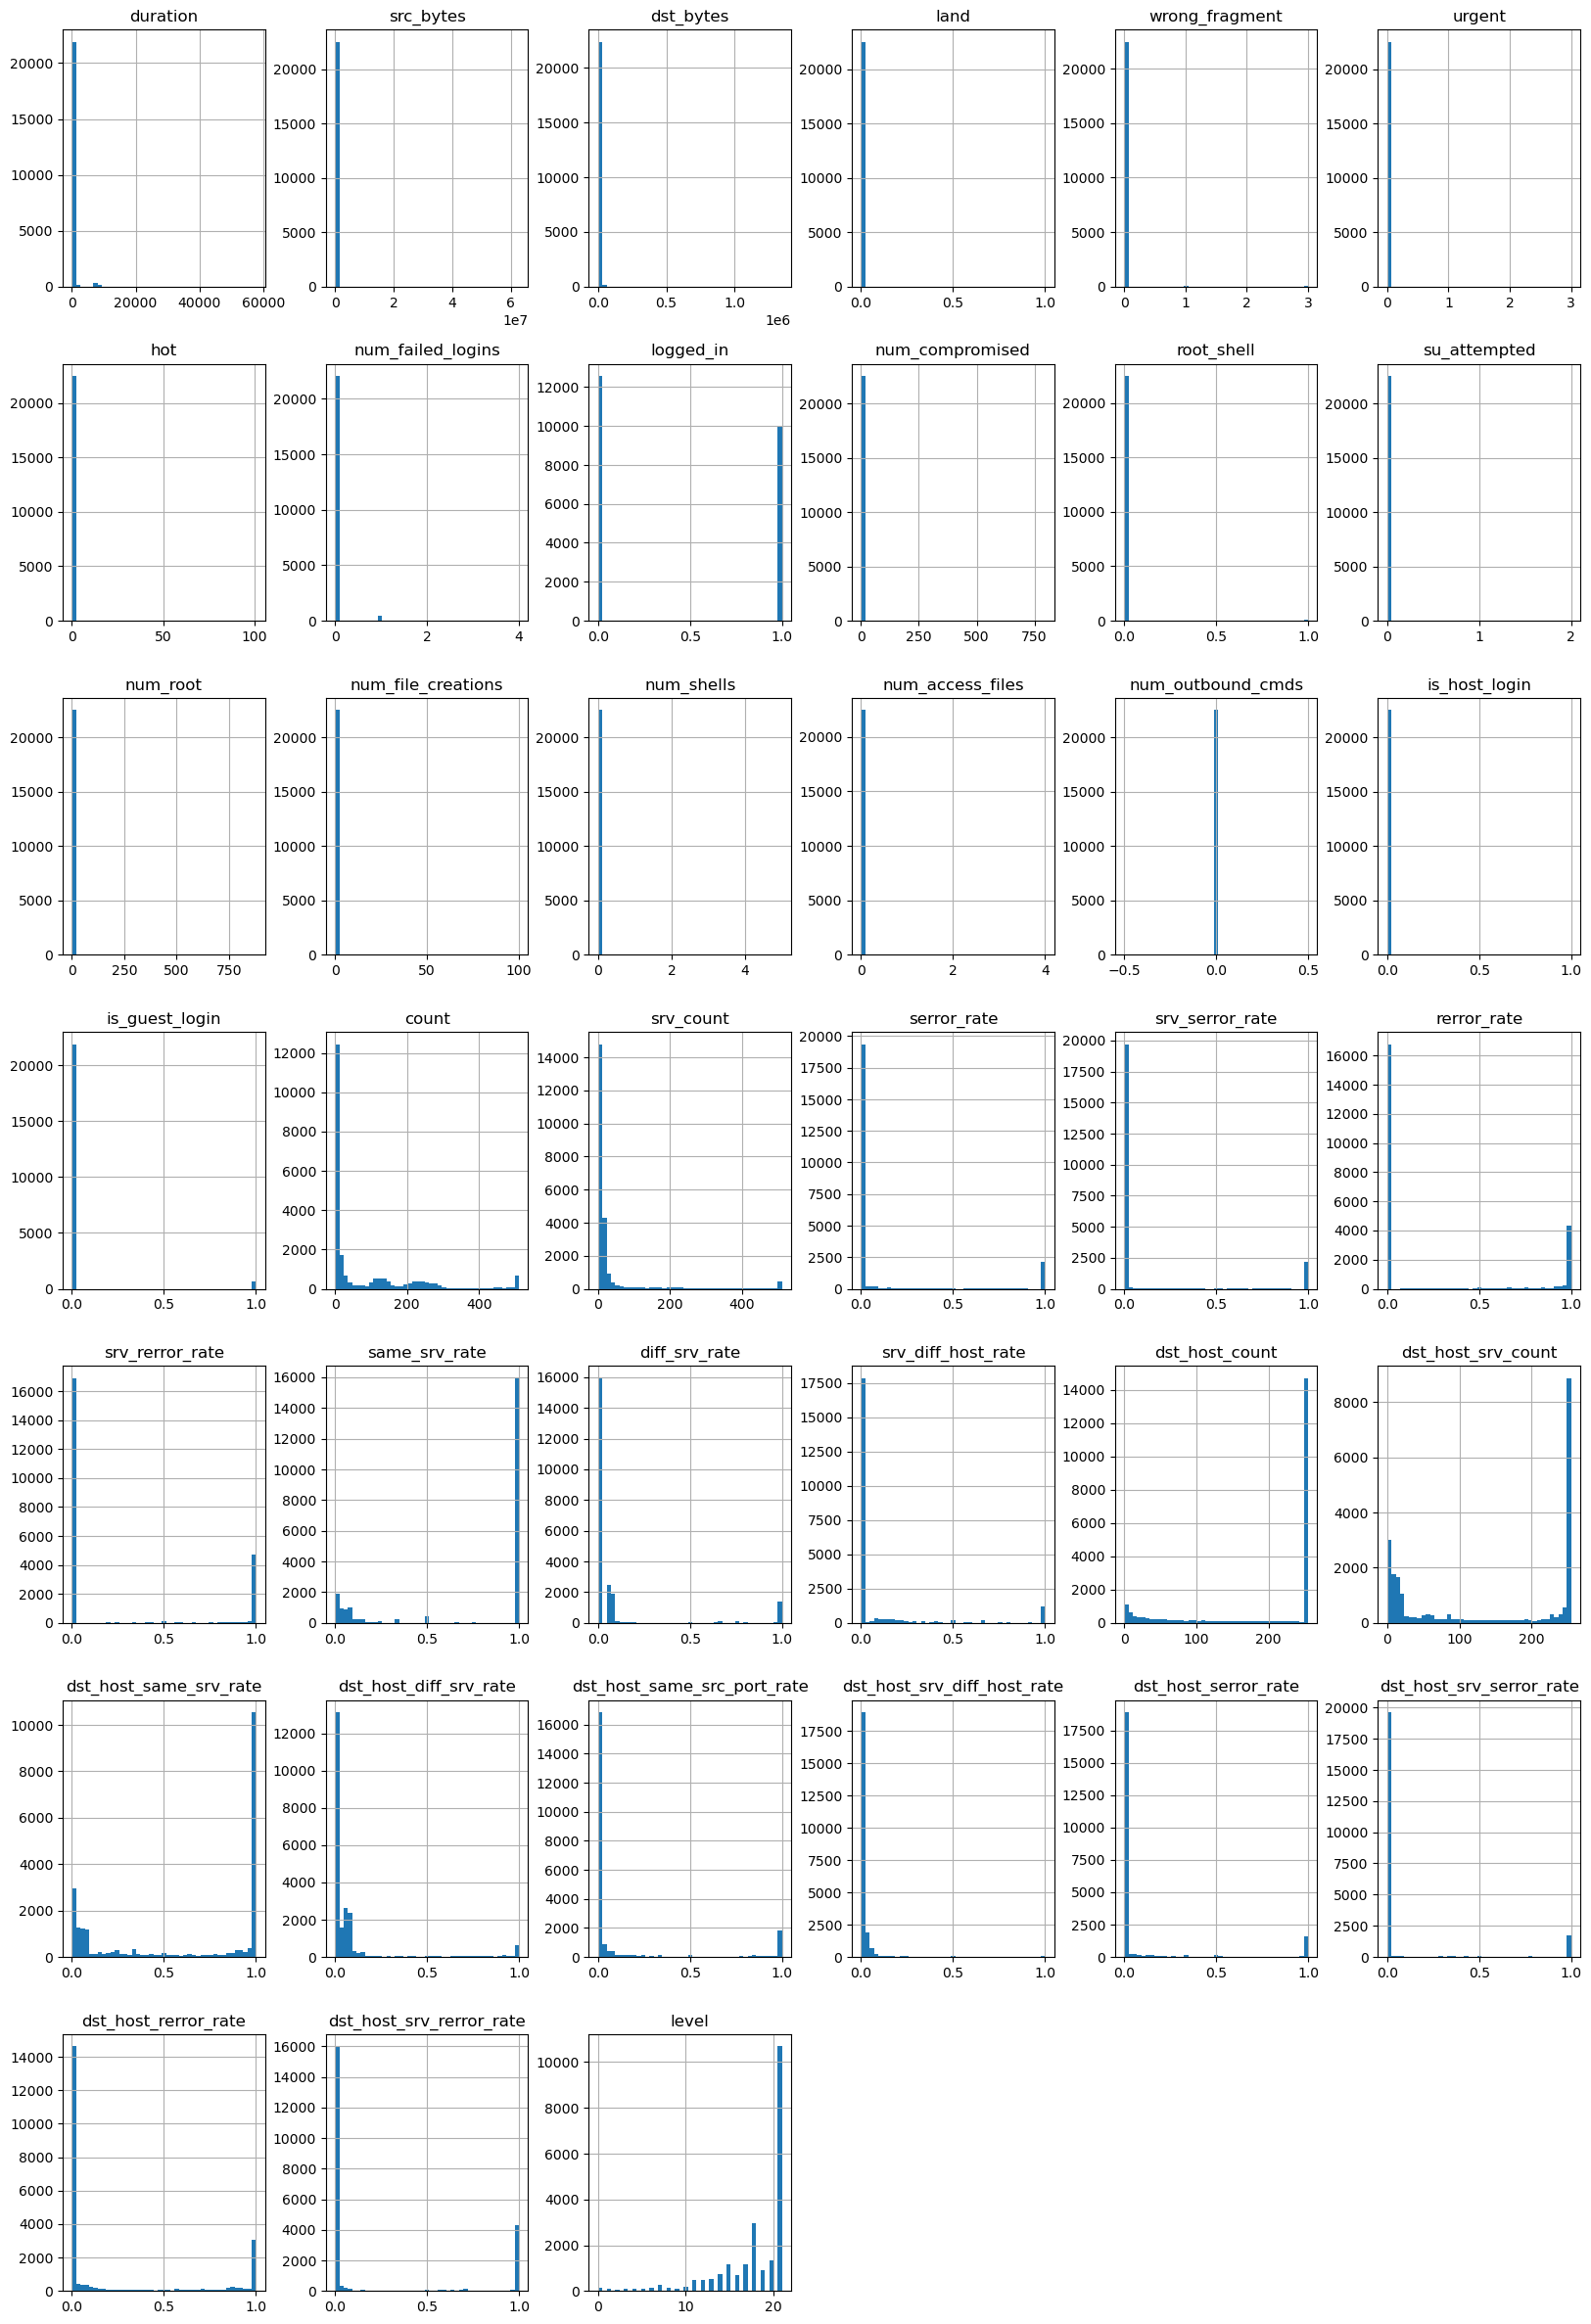

In [119]:
cell_df.hist(bins=43,figsize=(20,30));

create histograms for all numerical columns in a DataFrame

## 4.1 Protocol Type

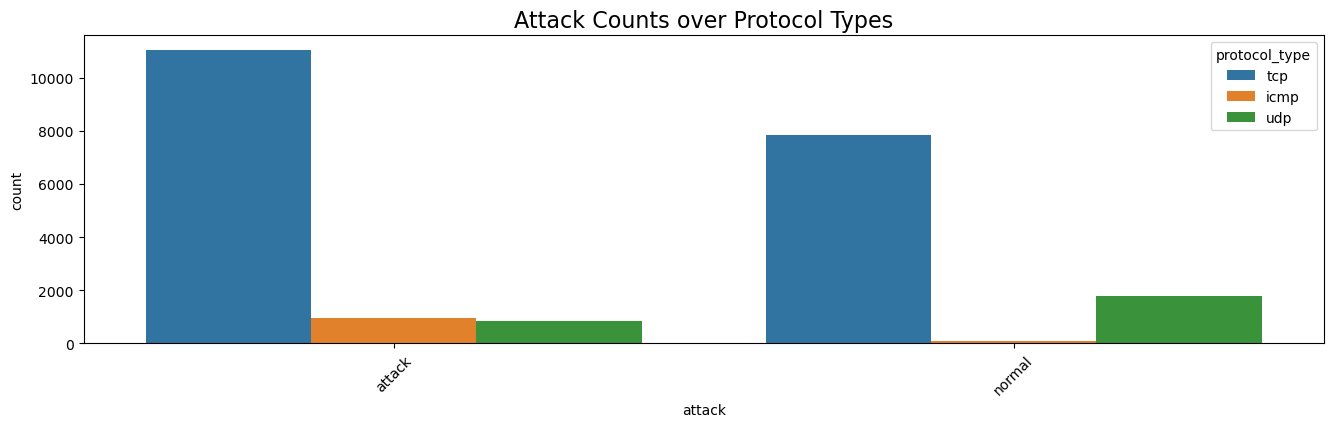

In [120]:
plt.figure(figsize=(16,4))
sns.countplot(x='attack',data=cell_df,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('Attack Counts over Protocol Types',fontdict={'fontsize':16})
plt.show()

In [121]:
# So we can see that most of the attacks are from tcp, then udp, and least attack comes from icmp

In [122]:
cell_df["protocol_type"].value_counts(normalize=True)

protocol_type
tcp     0.837466
udp     0.116267
icmp    0.046267
Name: proportion, dtype: float64

## 4.2 Service used general

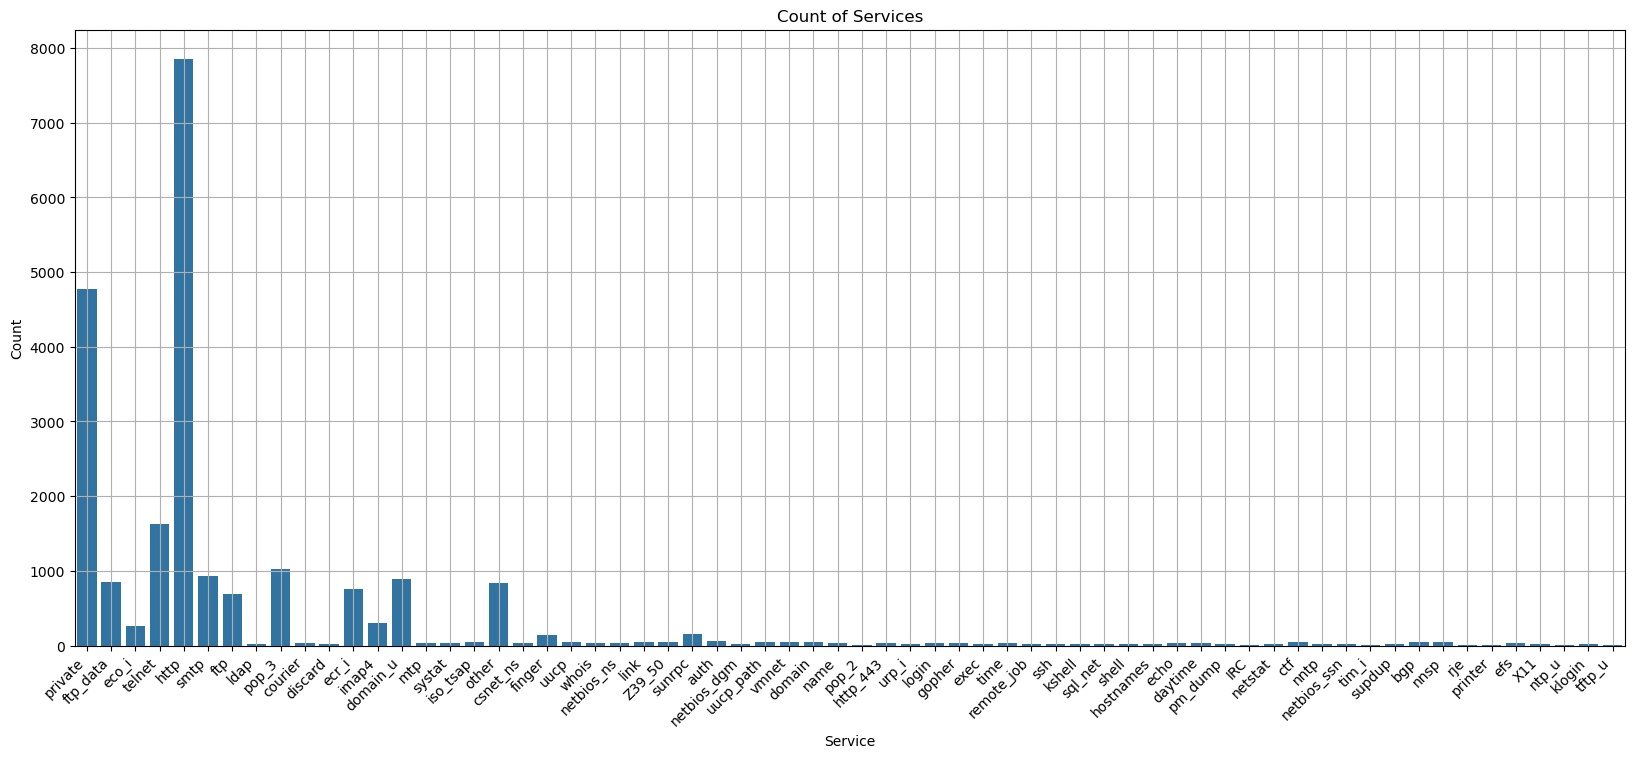

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', data=cell_df)

# Rotate the tick labels
plt.xticks(rotation=45, ha='right')

plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()


In [124]:
# Services most used in general follows as, http,private,domain_u,smtp, ftp,other..

## 4.3 Service used effect on attacks

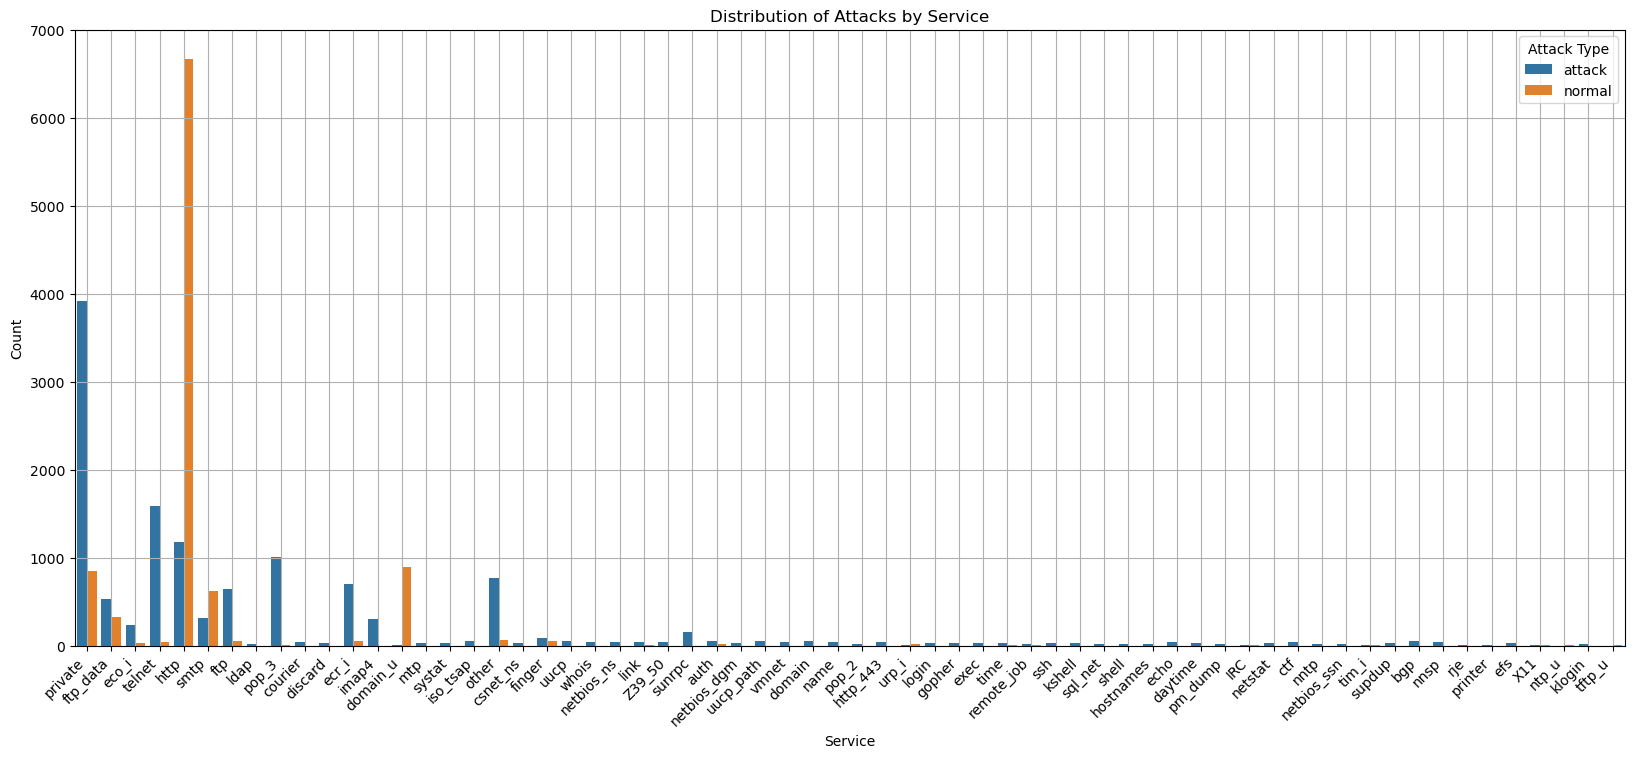

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', hue='attack', data=cell_df)

# Rotate the tick labels
plt.xticks(rotation=45, ha='right')

plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

In [126]:
#we can see that private attacks is most common service 

## 4.4 Kernel Density Estimate (KDE) Plot of Duration by Flag

In [127]:
#visualizes the distribution of the duration variable in our dataset, grouped by different categories in the flag variable.

C:\Users\shree\AppData\Local\Temp\ipykernel_15956\299523418.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(


<Figure size 1200x800 with 0 Axes>

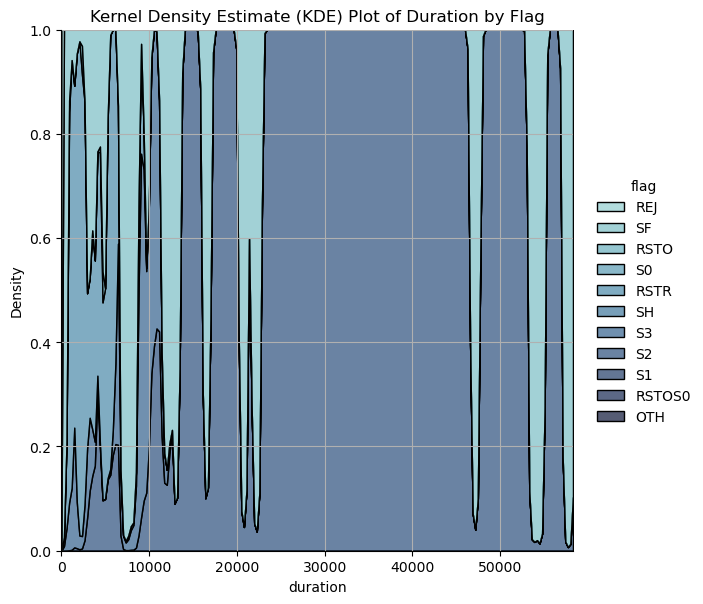

In [128]:
plt.figure(figsize=(12, 8))
sns.displot(
    data=cell_df,
    x="duration",
    hue="flag",
    kind="kde",
    height=6,
    multiple="fill",
    clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)
plt.title('Kernel Density Estimate (KDE) Plot of Duration by Flag')
plt.grid(True)
plt.show()

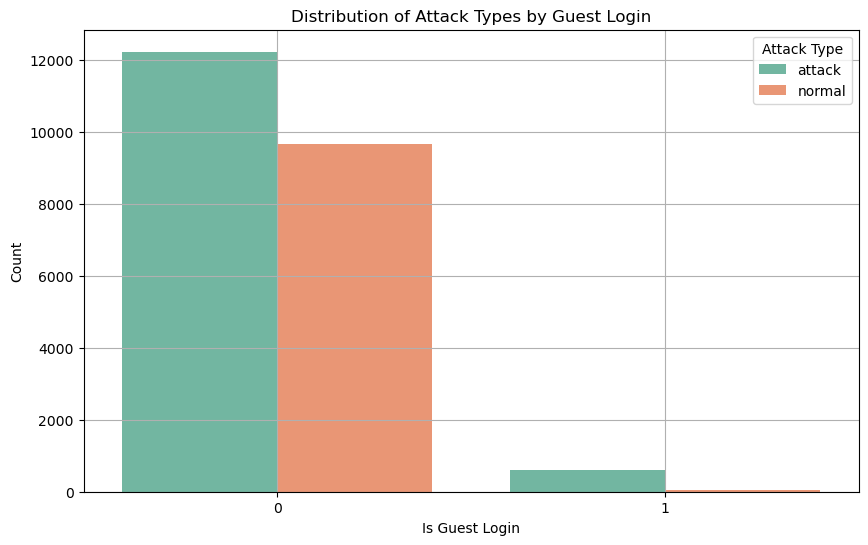

In [129]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_guest_login', hue='attack', data=cell_df, palette='Set2')
plt.xlabel('Is Guest Login')
plt.ylabel('Count')
plt.title('Distribution of Attack Types by Guest Login')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

In [130]:
#The majority of attacks happen when the guest is not logged in, according to the data.

## 5. PREPROCESSING

## 5.1 ENCODING

In [131]:
data_obj = cell_df.select_dtypes(['object']).columns

In [132]:
cell_df["attack"].value_counts()

attack
attack    12832
normal     9711
Name: count, dtype: int64

In [133]:
data_obj

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

In [134]:
from sklearn.preprocessing import LabelEncoder
protocol_type_le = LabelEncoder()
service_le = LabelEncoder()
flag_le = LabelEncoder()

In [135]:
cell_df['protocol_type'] = protocol_type_le.fit_transform(cell_df['protocol_type'])
cell_df['service'] = service_le.fit_transform(cell_df['service'])
cell_df['flag'] = flag_le.fit_transform(cell_df['flag'])
#convert categorical data into numerical data.

In [136]:
attack_n = []
for i in cell_df.attack :
  if i == 'normal':
    attack_n.append(0)
  else:
    attack_n.append(1)
cell_df['attack'] = attack_n 

In [137]:
cell_df['attack'].value_counts()

attack
1    12832
0     9711
Name: count, dtype: int64

Now, data is encoded!

<Axes: >

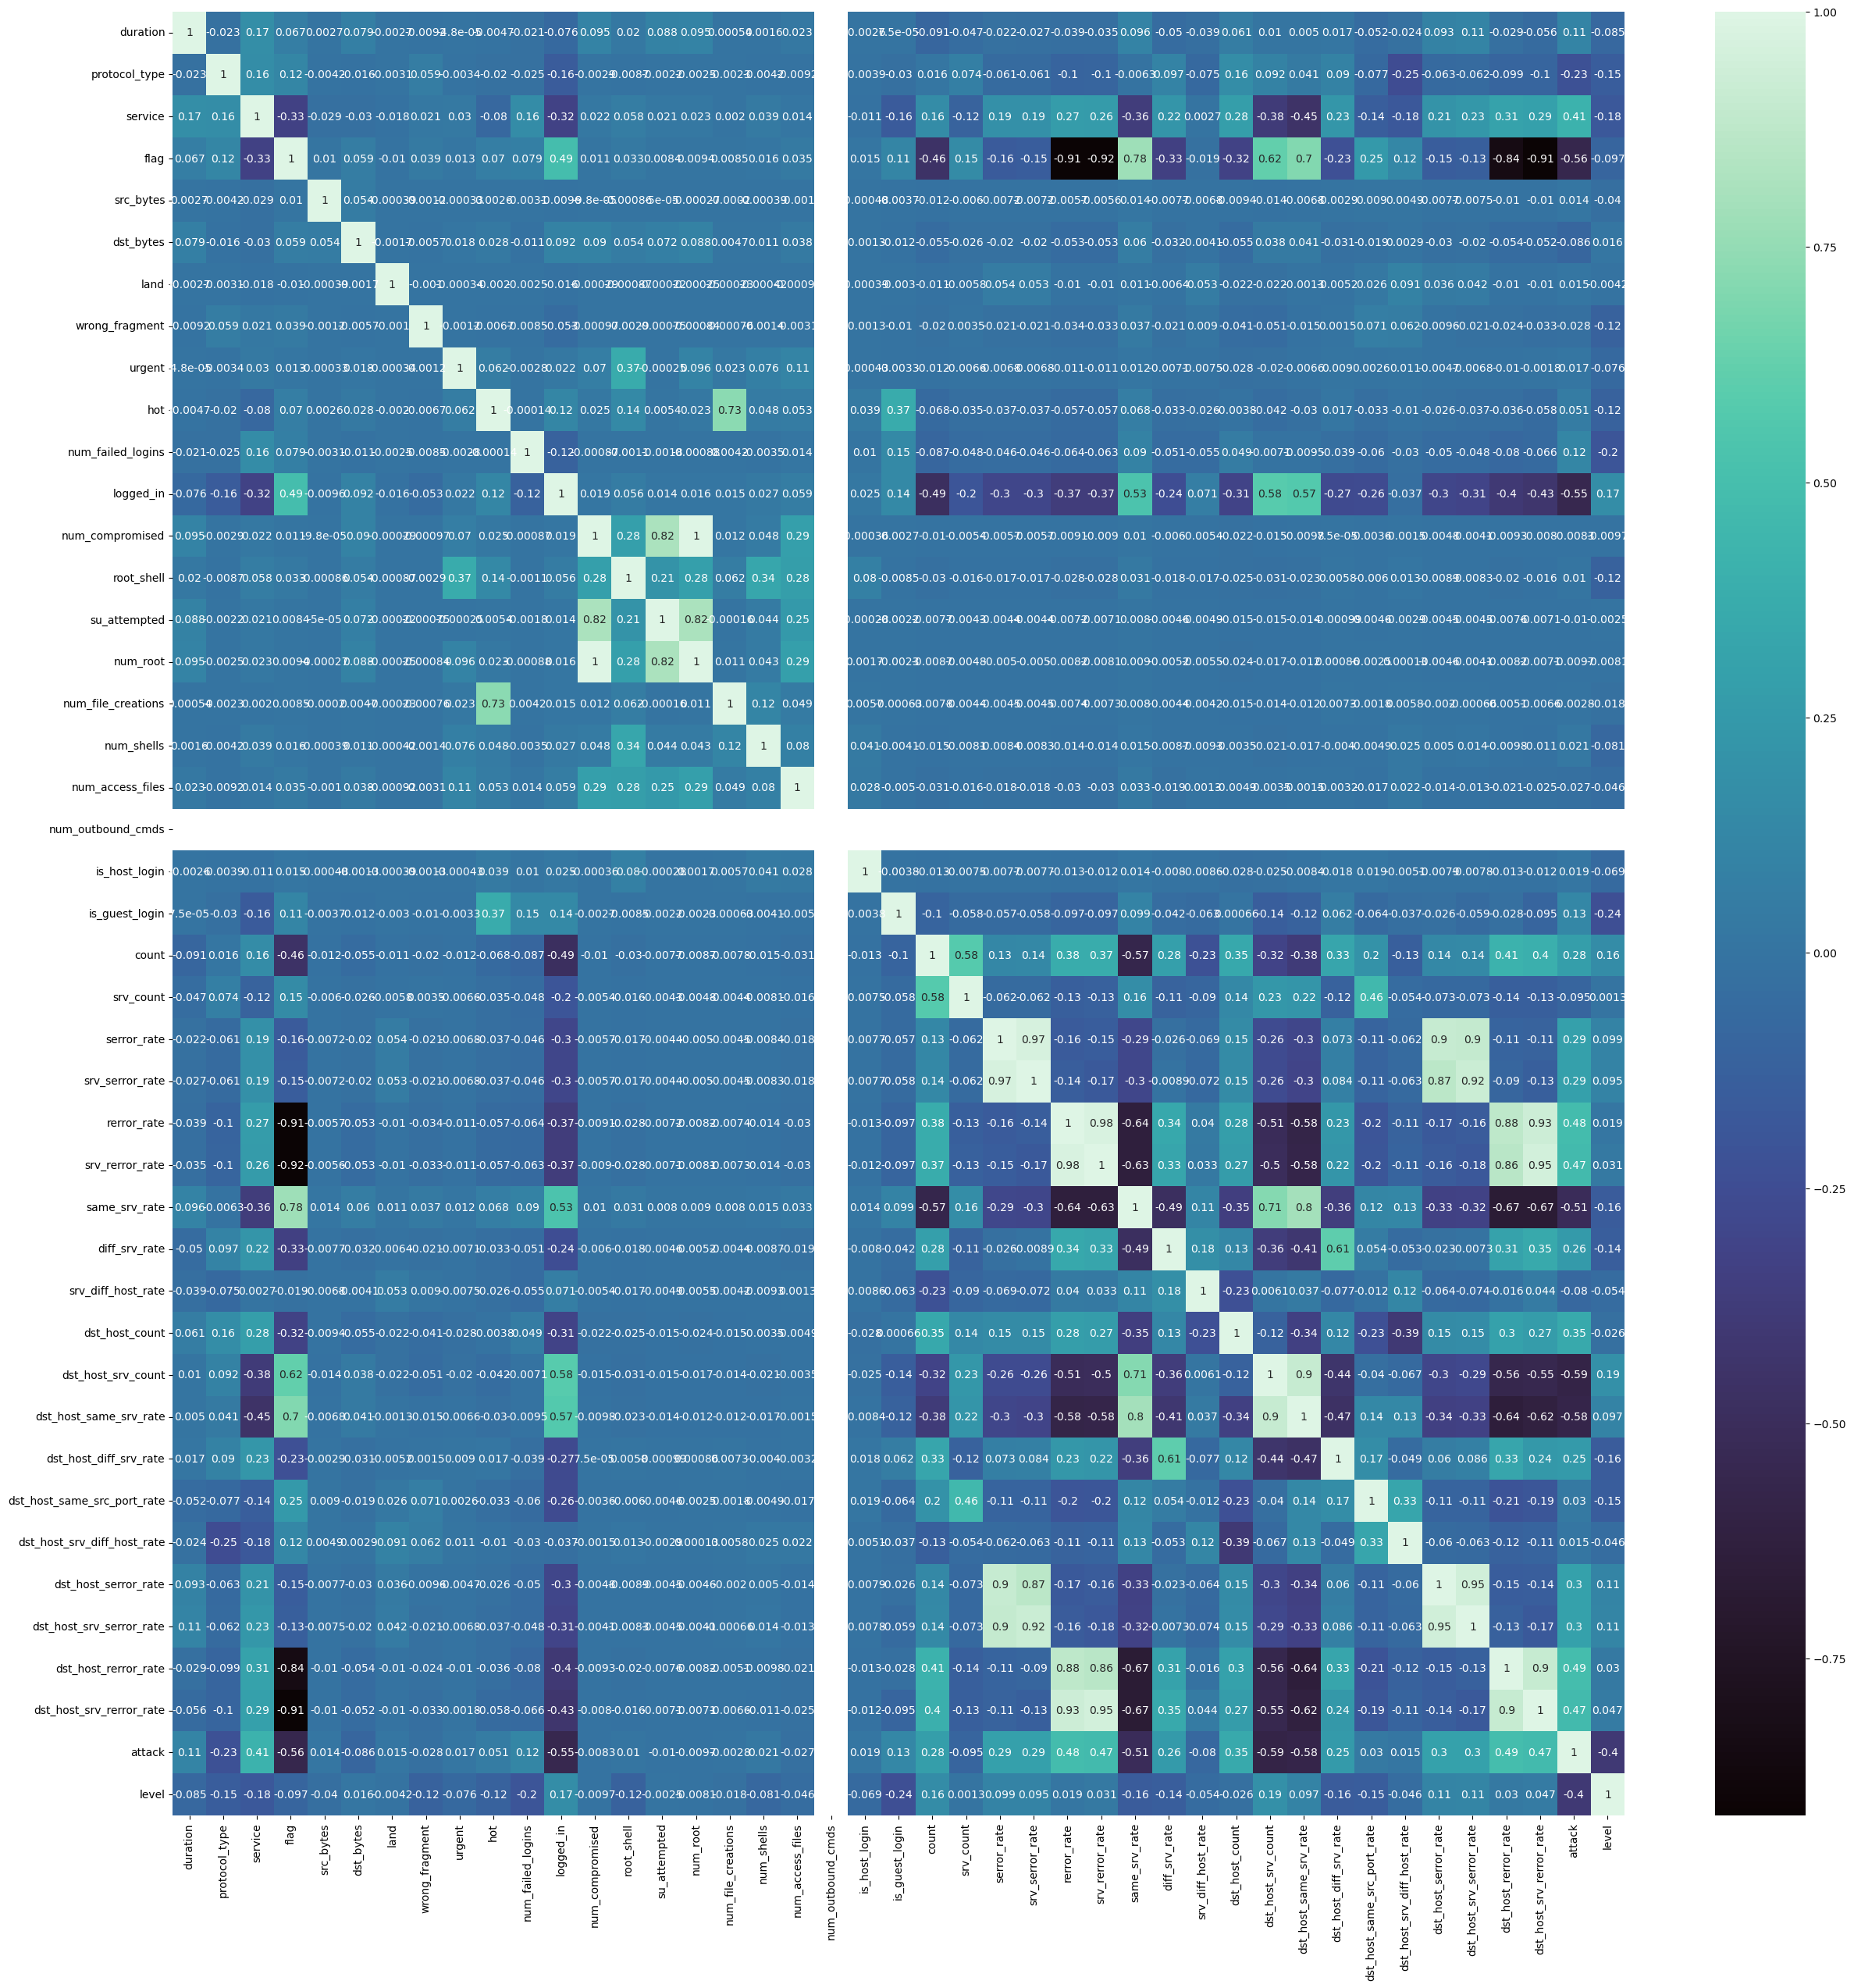

In [138]:
plt.figure(figsize=(30,30))
sns.heatmap(cell_df.corr(), annot= True,cmap='mako')

## 5.2 Data Split

In [139]:
y = cell_df['attack'].copy()
x = cell_df.drop(['attack'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.3, random_state=40)

In [140]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)

## 6 Data modeling using SVM Model

### 6.1 Linear Kernel SVC

In [141]:
# Maps data directly into the original space. It is useful when the number of features is less than the number of samples.

In [142]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay, roc_auc_score, roc_curve

from sklearn.model_selection import GridSearchCV

In [143]:


lin_svc = svm.LinearSVC().fit(x_train, y_train)
Y_pred =lin_svc.predict(x_test)
print('The Training accuracy = ',lin_svc.score(x_train, y_train))
print('The Testing accuracy = ',lin_svc.score(x_test, y_test))
print("------------------------------------------------")
print( "linearSVC  accuracy  : " + str(np.round(accuracy_score(y_test,Y_pred),3)))

c:\Users\shree\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


The Training accuracy =  0.9636882129277566
The Testing accuracy =  0.9621469761939967
------------------------------------------------
linearSVC  accuracy  : 0.962


c:\Users\shree\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [144]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      2954
           1       0.95      0.98      0.97      3809

    accuracy                           0.96      6763
   macro avg       0.96      0.96      0.96      6763
weighted avg       0.96      0.96      0.96      6763



### 6.2 RBF(Radial Basis Funtion) kernel

In [145]:
# Maps data into an infinite-dimensional space using Gaussian functions. It is useful when the number of features is greater than the number of samples.

In [146]:
rbf_svc = svm.SVC(kernel='rbf').fit(x_train, y_train)
Y_pred_rbf =rbf_svc.predict(x_test)
print('The Training accuracy = ',rbf_svc.score(x_train, y_train))
print('The Testing accuracy = ',rbf_svc.score(x_test, y_test))
print("------------------------------------------------")
print( "SVM (kernel: 'rbf')  accuracy  : " + str(np.round(accuracy_score(y_test,Y_pred_rbf),3)))

The Training accuracy =  0.9910012674271229
The Testing accuracy =  0.9886145201833506
------------------------------------------------
SVM (kernel: 'rbf')  accuracy  : 0.989


In [147]:
print(classification_report(y_test,Y_pred_rbf))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2954
           1       0.98      1.00      0.99      3809

    accuracy                           0.99      6763
   macro avg       0.99      0.99      0.99      6763
weighted avg       0.99      0.99      0.99      6763



## 6.3 Poly Kernel

In [148]:
svclassifier_poly = SVC(kernel='poly')
poly = svclassifier_poly.fit(x_train,y_train)
Y_pred_poly =svclassifier_poly.predict(x_test)
print('The Training accuracy = ',poly.score(x_train, y_train))
print('The Testing accuracy = ',poly.score(x_test, y_test))
print("------------------------------------------------")
print( "SVM (kernel: 'poly')  accuracy  : " + str(np.round(accuracy_score(y_test,Y_pred_poly),3)))
print(classification_report(y_test,Y_pred_poly))

The Training accuracy =  0.9871356147021546
The Testing accuracy =  0.9825521218394204
------------------------------------------------
SVM (kernel: 'poly')  accuracy  : 0.983
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2954
           1       0.98      0.99      0.98      3809

    accuracy                           0.98      6763
   macro avg       0.98      0.98      0.98      6763
weighted avg       0.98      0.98      0.98      6763



## Grid Search

In [149]:
param_grid = {'C': [0.2,0.5,1], 'gamma': [0.5],'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid ,verbose=2, cv= 3,refit=False)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END .......................C=0.2, gamma=0.5, kernel=rbf; total time=   2.8s
[CV] END .......................C=0.2, gamma=0.5, kernel=rbf; total time=   2.9s
[CV] END .......................C=0.2, gamma=0.5, kernel=rbf; total time=   2.7s
[CV] END .......................C=0.5, gamma=0.5, kernel=rbf; total time=   2.3s
[CV] END .......................C=0.5, gamma=0.5, kernel=rbf; total time=   2.2s
[CV] END .......................C=0.5, gamma=0.5, kernel=rbf; total time=   2.4s
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time=   2.2s
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time=   2.3s
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time=   2.3s


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.2, 0.5, 1], 'gamma': [0.5], 'kernel': ['rbf']},
             refit=False, verbose=2)

In [150]:
print(grid.best_params_)

{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}


In [151]:
rbf_svc = svm.SVC(kernel=grid.best_params_['kernel'], gamma=grid.best_params_['gamma'], C=grid.best_params_['C']).fit(x_train, y_train)
Y_pred_rbf =rbf_svc.predict(x_test)
print(rbf_svc.score(x_train, y_train))
print(rbf_svc.score(x_test, y_test))
print("------------------------------------------------")
print( "SVM (kernel: 'rbf')  accuracy  : " + str(np.round(accuracy_score(y_test,Y_pred_rbf),3)))

0.9972750316856781
0.986692296318202
------------------------------------------------
SVM (kernel: 'rbf')  accuracy  : 0.987


In [152]:
print(classification_report(y_test,Y_pred_rbf))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2954
           1       0.98      1.00      0.99      3809

    accuracy                           0.99      6763
   macro avg       0.99      0.98      0.99      6763
weighted avg       0.99      0.99      0.99      6763



## Confusion Matrix

In [153]:
def plot_cm(y_true, y_pred, title):
    figsize=(10,10)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "mako", annot=annot, fmt='', ax=ax)

C:\Users\shree\AppData\Local\Temp\ipykernel_15956\2836768641.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


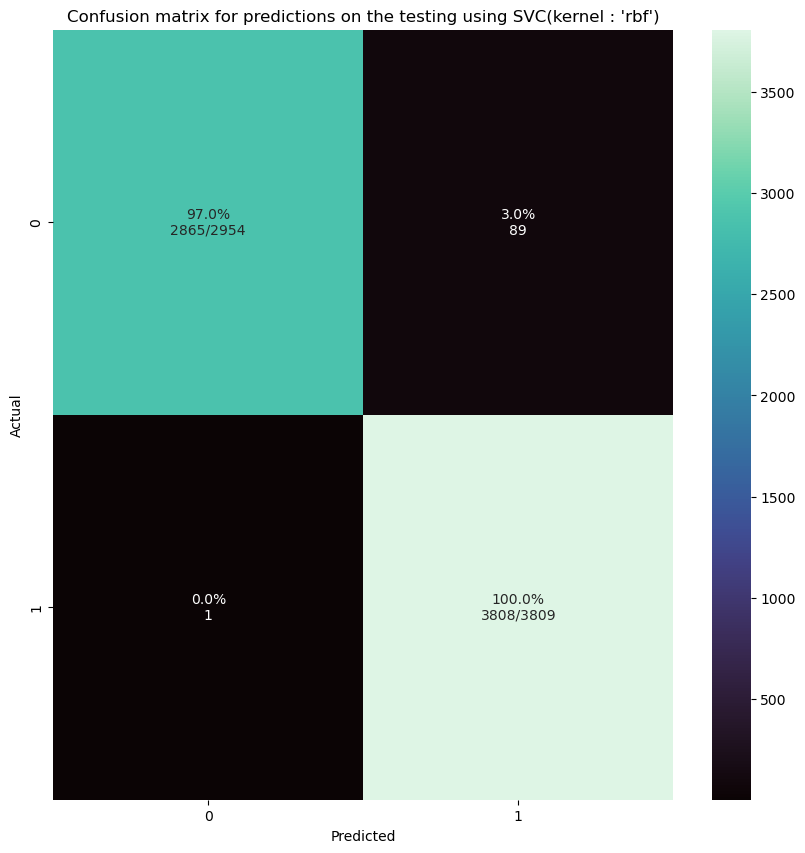

In [154]:
plot_cm(y_test,Y_pred_rbf, 'Confusion matrix for predictions on the testing using SVC(kernel : \'rbf\')')